In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import conceptnet_lite

conceptnet_lite.connect("data/conceptnet.db")
from conceptnet_lite import Label, edges_for

In [4]:
import mutual_info as mi
#from mutual_info import *
#len(mi.nearest_distances(texto1.T,k=3))


In [5]:
dfp=pd.read_pickle("data/prueba2_T.pickle")
dfp

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Input1,Input2,Model1,Model2
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 19.101225, 1.2564747,...","[0.03256245, 0.9674213, 1.6298849e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 15.958708, 1.2564747,...","[0.032293927, 0.9676897, 1.637127e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 13.145995, 53.678085,...","[0.86936, 0.016950097, 0.113689914]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 39.413757, 4.3888206, 17.930946, ...","[0.56929874, 0.4305042, 0.00019709245]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.0, 13.88712, 4.3888206, 1.63502...","[0.012144173, 0.9878521, 3.820453e-06]","[0.0, 1.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 3.9083166, 0.06153027...","[0.0071587614, 0.99284124, 1.5131656e-08]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 13.22332, 7.2733583, 11.074403, 0...","[0.019462422, 0.98053336, 4.2487504e-06]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.46309, 0.438

In [6]:
def obtener_distancia(num,dfp):
    texto_2_t=dfp.at[num,"Text"]
    hipotesis_2_t=dfp.at[num,"Hipotesis"]
    texto_2=dfp.at[num,"R_Text"]
    hipotesis_2=dfp.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    for i in range(max_t):
        lista=[]
        for j in range(max_h):
            lista.append(np.linalg.norm(texto_2[i] - hipotesis_2[j]))#*wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_l.append(lista)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=meartrh.columns
    borrar=[]
    for c in col:
        if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
    borrar_i=[]
    for index,strings in meartrh.iterrows():
        if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index)        
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    return meartrh.min().sum()

In [7]:
obtener_distancia(2,dfp)

21.441418

In [23]:
num=2

In [24]:
texto_2_t=dfp.at[num,"Text"]
hipotesis_2_t=dfp.at[num,"Hipotesis"]

In [25]:
texto_2=dfp.at[num,"R_Text"][:len(texto_2_t)]
hipotesis_2=dfp.at[num,"R_Hip"][:len(hipotesis_2_t)]

In [53]:
from scipy.stats import wasserstein_distance
lista_l=[]
lista_muinfor=[]
for i in range(len(texto_2)):
    lista=[]
    lista_mu=[]
    for j in range(len(hipotesis_2)):
        #lista.append()
        lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
    lista_l.append(lista)
    lista_muinfor.append(lista_mu)
print(lista_l)

[[0.0, 0.14834371000567137, 0.14314189248679515, 0.04248661595163868, 0.15720896474939455, 0.14674511956516645, 0.07285868312406818, 0.15115383563408002], [0.14834371000567137, 0.0, 0.039776257795747394, 0.11952449493071374, 0.018848522217401, 0.03271498635915729, 0.08956878707608362, 0.02293595313288581], [0.1097957642083929, 0.053927932448520274, 0.042343849267490435, 0.07668521629127395, 0.06032576798514736, 0.03989930119389705, 0.04980119041016831, 0.061601754725221926], [0.14314189248679515, 0.039776257795747394, 0.0, 0.11088015817920673, 0.0495237581699621, 0.043508170658024, 0.08123928318828501, 0.04600929076589334], [0.10710079250934842, 0.05124815081052174, 0.051013927761232467, 0.0800655218415583, 0.05930381252740819, 0.044490517150455426, 0.061965843960060774, 0.04992829896432037], [0.13152909719227554, 0.029655360479009695, 0.03480689064407973, 0.1010934178297611, 0.03567300200231936, 0.02515421463174182, 0.07529245541452836, 0.030985527330364346], [0.14834371000567137, 0.0

In [27]:
meartrh=pd.DataFrame(lista_l[:],index=texto_2_t,columns=hipotesis_2_t)
meartrh

,"NULL{null,PROPN}","a{a,DET}","boy{boy,NOUN}","sleeps{sleep,VERB}","in{in,ADP}","his{-PRON-,ADJ}","bed{bed,NOUN}",".{.,PUNCT}"
"NULL{null,PROPN}",3.182144,1.042905,0.810128,1.497910,1.065387,0.784926,1.221437,1.186866
"a{a,DET}",1.042905,2.531489,0.570497,1.043325,0.672141,0.524536,0.866071,0.806901
"young{young,ADJ}",0.932604,0.654945,0.637271,0.913569,0.631141,0.493027,0.763194,0.708851
"boy{boy,NOUN}",0.810128,0.570497,2.164918,0.850699,0.521659,0.396240,0.693766,0.642949
"runs{run,VERB}",1.267257,0.787611,0.633109,1.222658,0.815280,0.604378,0.965694,0.921933
"across{across,ADP}",1.049483,0.698802,0.547901,1.071035,0.740243,0.545035,0.866066,0.797880
"a{a,DET}",1.042905,2.531489,0.570497,1.043325,0.672141,0.524536,0.866071,0.806901
"road{road,NOUN}",1.129392,0.742304,0.571621,1.106631,0.748415,0.537001,0.850080,0.848251
"in{in,ADP}",1.065387,0.672141,0.521659,1.070861,2.552514,0.541458,0.856114,0.799241
"front{front,NOUN}",1.190022,0.774416,0.608782,1.139501,0.750115,0.605350,0.939504,0.877457


In [28]:
col=meartrh.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar

['NULL{null,PROPN}', 'a{a,DET}', 'in{in,ADP}', '.{.,PUNCT}']

In [29]:
borrar_i=[]
for index,strings in meartrh.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        
borrar_i

['NULL{null,PROPN}',
 'a{a,DET}',
 'across{across,ADP}',
 'a{a,DET}',
 'in{in,ADP}',
 'of{of,ADP}',
 'a{a,DET}',
 'with{with,ADP}',
 '.{.,PUNCT}']

In [30]:
meartrh=meartrh.drop(borrar,axis=1)
meartrh=meartrh.drop(borrar_i,axis=0)
#meartrh=meartrh.drop("is{be,VERB}",axis=0)
meartrh

,"boy{boy,NOUN}","sleeps{sleep,VERB}","his{-PRON-,ADJ}","bed{bed,NOUN}"
"young{young,ADJ}",0.637271,0.913569,0.493027,0.763194
"boy{boy,NOUN}",2.164918,0.850699,0.396240,0.693766
"runs{run,VERB}",0.633109,1.222658,0.604378,0.965694
"road{road,NOUN}",0.571621,1.106631,0.537001,0.850080
"front{front,NOUN}",0.608782,1.139501,0.605350,0.939504
"sky{sky,NOUN}",0.618252,1.157001,0.608877,0.933814
"blue{blue,ADJ}",0.509182,1.006851,0.474849,0.794277
"building{building,NOUN}",0.587485,1.083678,0.537890,0.875056
"barred{barred,ADJ}",0.620026,1.172900,0.538434,0.928974
"windows{window,NOUN}",0.606192,1.178254,0.588791,0.908631


In [31]:
meartrh.idxmax()

boy{boy,NOUN}          boy{boy,NOUN}
sleeps{sleep,VERB}    runs{run,VERB}
his{-PRON-,ADJ}        sky{sky,NOUN}
bed{bed,NOUN}         runs{run,VERB}
dtype: object

In [34]:
meartrh.min().sum()

2.4498865875012457

In [35]:
meartrh.sum().sum()

32.426407138510754

# Para normalizar vectores

In [34]:
#norms = np.linalg.norm(texto_2, axis=-1, keepdims=True)
#norms = np.where(norms == 0, 1, norms)
#print(texto_2 / norms)

In [35]:
#ma_2=np.dot(texto_2,texto_2.T)
#ma_2

In [36]:
#madt=pd.DataFrame(ma_2)
#madt

In [37]:
#madt.min()

# Lectura de matriz de alineamiento

In [36]:
df = pd.read_pickle("data/prueba100.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.7027438, 0.20296031...","[0.4928643, 0.50155383, 0.0055818837]","[1.0, 0.0, 0.0]"
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.64837056, 0.2029603...","[0.4695498, 0.3973312, 0.13311893]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.4078711, 2.2245083,...","[1.4341879e-06, 8.787866e-05, 0.9999107]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 1.9305927, 0.10360007, 0.8346571, ...","[0.033964496, 0.008023773, 0.9580117]","[0.0, 0.0, 1.0]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.5160244, 0.10360007...","[0.0027733932, 0.9895504, 0.0076761814]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.41359743, 0.0717519...","[0.8000752, 0.17865694, 0.021267932]","[1.0, 0.0, 0.0]"
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.475788, 0.8695118, 0.72379255, 0...","[0.7528739, 0.18234292, 0.06478321]","[1.0, 0.0, 0.0]"
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.43997452, 1.9583746...","[7.513892e-05, 0.0013085654, 0.99861634]","[0.0, 0.0, 1.0]"
98,98,"[NULL{null,ADJ}, four{four,NUM}, children{chil...","[NULL{null,PROPN}, the{the,DET}, children{chil...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.44769567, 0.0726737...","[0.034316223, 0.83774996, 0.12793382]","[0.0, 0.0, 1.0]"


In [37]:
indice=2

In [38]:
t=pd.DataFrame(df.at[indice,"Text"])
h=pd.DataFrame(df.at[indice,"Hipotesis"])
print(len(t))
print(len(h))

19
8


In [39]:
texto1=pd.DataFrame(df.at[indice,"R_Text"])
hipotesis1=pd.DataFrame(df.at[indice,"R_Hip"])

In [40]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto1[1:len(t)],hipotesis1[1:len(h)].T),index=t[1:],columns=h[1:])
#ma=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
ma

,"(a{a,DET},)","(boy{boy,NOUN},)","(sleeps{sleep,VERB},)","(in{in,ADP},)","(his{-PRON-,ADJ},)","(bed{bed,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",1.000000,0.368482,0.140102,0.454527,0.505652,0.295203,0.291600
"(young{young,ADJ},)",0.372369,0.684768,0.173587,0.297690,0.440236,0.270296,0.258760
"(boy{boy,NOUN},)",0.368482,1.000000,0.331375,0.250200,0.501530,0.373476,0.257555
"(runs{run,VERB},)",0.339245,0.221918,0.305346,0.301447,0.367234,0.164607,0.237685
"(across{across,ADP},)",0.354088,0.218106,0.099920,0.513059,0.338878,0.261370,0.273549
"(a{a,DET},)",1.000000,0.368482,0.140102,0.454527,0.505652,0.295203,0.291600
"(road{road,NOUN},)",0.290017,0.287958,0.179893,0.307242,0.348442,0.275574,0.323225
"(in{in,ADP},)",0.454527,0.250200,0.138889,1.000000,0.424085,0.319833,0.300469
"(front{front,NOUN},)",0.412706,0.307222,0.202102,0.333334,0.426733,0.376538,0.321544
"(of{of,ADP},)",0.450585,0.226490,0.034546,0.542424,0.470308,0.232095,0.314684


In [41]:
col=ma.columns
borrar=[]
for c in col:
    if ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)) or "be,VERB" in str(c) :
        borrar.append(c)        
borrar

[('a{a,DET}',), ('in{in,ADP}',), ('.{.,PUNCT}',)]

In [42]:
borrar_i=[]
for index,strings in ma.iterrows():
    if ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)) or "be,VERB" in str(index) :
        borrar_i.append(index)        
borrar_i

[('a{a,DET}',),
 ('across{across,ADP}',),
 ('a{a,DET}',),
 ('in{in,ADP}',),
 ('of{of,ADP}',),
 ('a{a,DET}',),
 ('with{with,ADP}',),
 ('.{.,PUNCT}',)]

In [43]:
ma=ma.drop(borrar,axis=1)
ma=ma.drop(borrar_i,axis=0)
ma

,"(boy{boy,NOUN},)","(sleeps{sleep,VERB},)","(his{-PRON-,ADJ},)","(bed{bed,NOUN},)"
"(young{young,ADJ},)",0.684768,0.173587,0.440236,0.270296
"(boy{boy,NOUN},)",1.000000,0.331375,0.501530,0.373476
"(runs{run,VERB},)",0.221918,0.305346,0.367234,0.164607
"(road{road,NOUN},)",0.287958,0.179893,0.348442,0.275574
"(front{front,NOUN},)",0.307222,0.202102,0.426733,0.376538
"(sky{sky,NOUN},)",0.321490,0.228905,0.280216,0.266658
"(blue{blue,ADJ},)",0.377659,0.142837,0.237338,0.293339
"(building{building,NOUN},)",0.181932,0.136667,0.360491,0.279491
"(barred{barred,ADJ},)",0.185368,-0.020026,0.245087,0.032719
"(windows{window,NOUN},)",0.164279,0.155387,0.132521,0.262116


In [44]:
ma=ma.T

In [45]:
print(ma.idxmax())

(young{young,ADJ},)             (boy{boy,NOUN},)
(boy{boy,NOUN},)                (boy{boy,NOUN},)
(runs{run,VERB},)             (his{-PRON-,ADJ},)
(road{road,NOUN},)            (his{-PRON-,ADJ},)
(front{front,NOUN},)          (his{-PRON-,ADJ},)
(sky{sky,NOUN},)                (boy{boy,NOUN},)
(blue{blue,ADJ},)               (boy{boy,NOUN},)
(building{building,NOUN},)    (his{-PRON-,ADJ},)
(barred{barred,ADJ},)         (his{-PRON-,ADJ},)
(windows{window,NOUN},)         (bed{bed,NOUN},)
dtype: object


<AxesSubplot:>

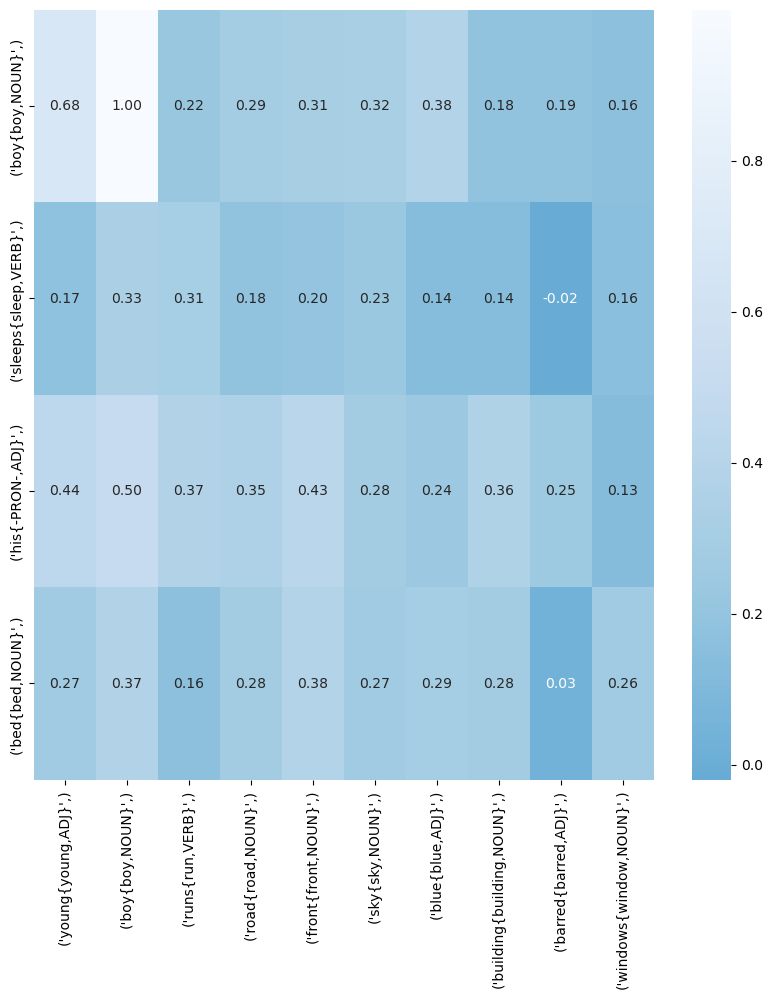

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

In [47]:
ma.max().sum()

4.39402

In [48]:
ma.index

Index([     ('boy{boy,NOUN}',), ('sleeps{sleep,VERB}',),
          ('his{-PRON-,ADJ}',),      ('bed{bed,NOUN}',)],
      dtype='object')

# Checar cuant suma la información por clase

In [49]:
prueba=pd.read_csv("data/prueba.csv")

In [50]:
prueba

,Unnamed: 0.1,Unnamed: 0,gold_label,sentence1,sentence2,SET
0,568111,558275,entailment,"A man wearing a blue shirt, black apron, eyegl...",A person in appropriate institution protection...,TEST
1,568812,558976,entailment,A man dressed in a red shirt and black tie sta...,a guy in a red top and tie makes a speech,TEST
2,560781,550939,contradiction,A young boy runs across a road in front of a s...,A boy sleeps in his bed.,TEST
3,565799,555963,contradiction,An Asian woman is standing on a path with a ba...,Nobody is standing,TEST
4,562665,552829,neutral,A child in a maroon shirt playing next to a fo...,The child is getting wet from the fountain.,TEST
...,...,...,...,...,...,...
95,567068,557232,entailment,"A group of men in blue shirts, banded hats, an...",a bunch of guys in colorful clothes stand toge...,TEST
96,568650,558814,entailment,A woman holding a newborn baby.,woman holds baby,TEST
97,559485,549643,contradiction,A skateboarding youth does a trick on a rail.,A man painting a tree.,TEST
98,559755,549913,contradiction,Four children are playing in some water.,The children are doing chores.,TEST


In [51]:
def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [ ]:
lista.append()

In [83]:
sumas=[]
distancias=[]
entropias=[]
etiquetas=[]
mearts=[]
mutinf=[]
for num, strings in df.iterrows():
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index,strings in maalign.iterrows():
        if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    sumas.append(maalign.max().sum())
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.sum().sum())
    mutinf.append(MI_.sum().sum())
    distancias.append(obtener_distancia(num,dfp))

C:\Users\Ninja\AppData\Local\Temp\ipykernel_11904\781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11904\781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11904\781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11904\781148394.py:4: DeprecationWarning: Calli

In [84]:
clases=prueba["gold_label"].values
temp =np.array([sumas,distancias,entropias,mutinf,mearts,clases])
df_sumas = pd.DataFrame(temp.T,columns=["suma","distancias","entropias","mutual_info","m_earth","CLASS"])
df_sumas

,suma,distancias,entropias,mutual_info,m_earth,CLASS
0,2.697226,39.145676,4.927,55.607137,0.454694,entailment
1,1.924439,13.863625,4.22,16.42296,0.153727,entailment
2,1.12212,21.441418,4.357,22.928865,0.176884,contradiction
3,0.428242,5.69077,3.418,6.693762,0.092655,contradiction
4,0.859084,12.320528,3.0,5.602178,0.047716,neutral
...,...,...,...,...,...,...
95,2.609311,29.301109,4.739,37.161263,0.303341,entailment
96,0.659462,13.969722,2.0,4.697058,0.023913,entailment
97,1.006833,20.708521,3.457,12.486768,0.112801,contradiction
98,0.745137,14.175783,2.585,5.676195,0.038108,contradiction


In [85]:
df_sumas.to_csv("prueba_medidas.csv",index=False)

<AxesSubplot:title={'center':'m_earth'}, xlabel='CLASS'>

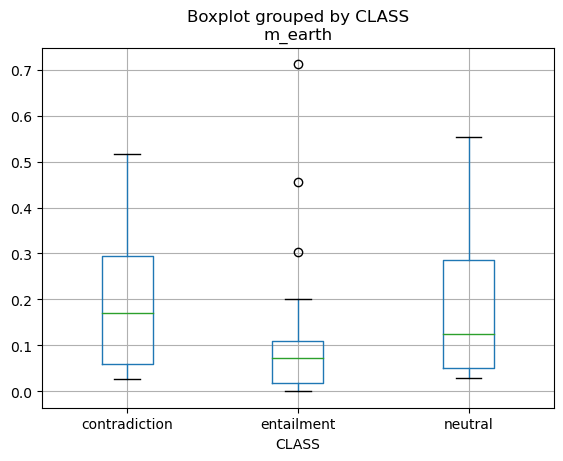

In [86]:
df_sumas.boxplot(by="CLASS",column=["m_earth"])

<AxesSubplot:title={'center':'distancias'}, xlabel='CLASS'>

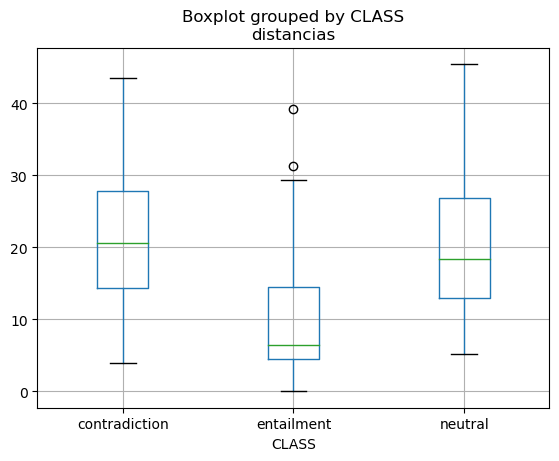

In [89]:
df_sumas.boxplot(by="CLASS",column=["distancias"])

In [ ]:
pd.DataFrame()

In [25]:
#pd.DataFrame(np.dot(ma,meartrh.T))

# Texto -> Hipótesis, tomando la longitud de la hipótesis en [NOUN,VERB,ADJ,ADV]

In [51]:
maximo=0
columna_v=""
indice_v=""
for c in ma.columns:
    if("VERB" in str(c)):
        for index,strings in ma.iterrows():
            if "VERB" in str(index):
                if maximo<strings[c]:
                    maximo=strings[c]
                    columna_v=c
                    indice_v=index
                #print(ma[c].max(),c,ma[c].idxmax())v
print(maximo, columna_v,indice_v)


0.272659 ('works{work,VERB}',) ('handling{handle,VERB}',)


In [52]:
ma.quantile(0.25).values

array([0.16527408, 0.18203863, 0.04249095, 0.16054884, 0.16571249,
       0.09689933])

In [185]:
def getRelacionesMA_corte(indice,df,dfp):
    indices=[]
    todas_relaciones=[]
    todas_relacionest=[]
    #print(len(df.at[indice,"Text"]),len(df.at[indice,"Hipotesis"]))
    if len(df.at[indice,"Text"]) > 42 and len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"])
        h=pd.DataFrame(df.at[indice,"Hipotesis"])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)],hipotesis[1:len(h)].T),index=t[1:42],columns=h[1:42])
    elif len(df.at[indice,"Text"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"])
        h=pd.DataFrame(df.at[indice,"Hipotesis"])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)],hipotesis[1:len(h)].T),index=t[1:42],columns=h[1:])
    elif len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"])
        h=pd.DataFrame(df.at[indice,"Hipotesis"])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)],hipotesis[1:len(h)].T),index=t[1:],columns=h[1:42])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t)
    else:
        t=pd.DataFrame(df.at[indice,"Text"])
        h=pd.DataFrame(df.at[indice,"Hipotesis"])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)],hipotesis[1:len(h)].T),index=t[1:],columns=h[1:])
        #ma=pd.DataFrame(df.at[indice,"Text"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
    #ma=ma/(ma.sum()).sum()
    col=ma.columns
    borrar=[]
    for c in col:
        if ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)) or "be,VERB" in str(c) :
            borrar.append(c)        
    borrar_i=[]
    for index,strings in ma.iterrows():
        if ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)) or "be,VERB" in str(index) :
            borrar_i.append(index)        
    #print(ma)
    ma=ma.drop(borrar,axis=1)
    ma=ma.drop(borrar_i,axis=0)
    c=ma.mean().values #.quantile(corte).values
    for index,strings in ma.iterrows():
        #print(index)
        for l in range(len(c)):
            if 'NOUN' in str(index) or 'VERB' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):
                if 'NOUN' in str(ma.columns[l]) or 'VERB' in str(index) or 'ADJ' in str(ma.columns[l]) or 'PRON' in str(ma.columns[l]) or 'ADV' in str(ma.columns[l]):
                    if strings[l] >= c[l]:# >=1:
                        todas_relaciones.append((index,ma.columns[l],strings[l]))
    #obtener información copmo caracteristicas
    distancia_words=obtener_distancia(indice,dfp)/len(c)
    suma_words=ma.sum().sum()
    informacion_words=ma.max().sum()

    maximo=0
    indice_v=""
    columna_v=""
    c=ma.max()
    for l in range(len(c)):
        for index,strings in ma.iterrows():
            if("VERB" in str(index)):
                if("VERB" in str(ma.columns[l])):
                    if maximo<c[l]:
                        maximo=c[l]
                        columna_v=str(ma.columns[l]).split('\'')[1].split("{")[0]
                        indice_v=str(index).split('\'')[1].split("{")[0]
    print(indice_v,columna_v)
    #Dirección contraria
    # mat=ma.transpose()
    # c1=mat.mean().values #.quantile(corte).values
    # for index,strings in mat.iterrows():
    #     for l in range(len(c1)):
    #         if 'NOUN' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):                
    #             if 'NOUN' in str(mat.columns[l]) or 'ADJ' in str(mat.columns[l]) or 'PRON' in str(mat.columns[l]) or 'ADV' in str(mat.columns[l]):
    #                 if strings[l] >=c1[l]:# >=1:
    #                     todas_relacionest.append((index,mat.columns[l],strings[l]))
    labels=["NOUN","ADJ","ADV"]
    diccionarioTW = {}
    print(todas_relaciones)
    for l1 in labels[:]:
        for l2 in labels[:]:
            diccionarioTW[l1+"_"+l2]=[]
    for tr in todas_relaciones:
        #print(tr[0],"-",tr[1])
        t_=str(tr[0]).split(",")
        pt=t_[1].split("}")[0]
        h_=str(tr[1]).split(",")
        #print(t_,h_,"h0",h_[0])
        ph=h_[1].split("}")[0]
        if pt=="PRON":
            pt="NOUN"
        if ph=="PRON":
            ph="NOUN"
        #diccionarioTW[pt+"_"+ph].append(tr[2])
        if pt+"_"+ph in diccionarioTW:
            diccionarioTW[pt+"_"+ph].append(tr[2])
    diccionarioTW_mean={}
    #diccionarioTW_mean_n={}
    #diccionarioTW_rel={}
    for k in diccionarioTW:
        if len(diccionarioTW[k])!=0:
            diccionarioTW_mean[k]=sum(diccionarioTW[k])/len(diccionarioTW[k])
            #diccionarioTW_mean_n[k+"_"]=len(diccionarioTW[k])#/ma.shape[0]
            #diccionarioTW_rel[k+"_r"]=sum(diccionarioTW[k])/len(diccionarioTW[k])#/ma.shape[0]
        else:
            diccionarioTW_mean[k]=0
            #diccionarioTW_mean_n[k+"_"]=0
            #diccionarioTW_rel[k+"_r"]=0
    return diccionarioTW_mean,todas_relaciones,indice_v,columna_v,distancia_words,suma_words,informacion_words
    #return diccionarioTW_mean,diccionarioTW_mean_n,todas_relaciones,todas_relacionest,diccionarioTW_rel,indice_v,columna_v,distancia_words,suma_words,informacion_words

# Lectura de los 100 pares de T y H (muestreo)

In [93]:
prueba=pd.read_csv("data/prueba.csv")

In [43]:
textos = prueba["sentence1"].to_list()
hipotesis = prueba["sentence2"].to_list()
print(textos)
print(hipotesis)

['A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.', 'A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech.', 'A young boy runs across a road in front of a sky blue building with barred windows.', 'An Asian woman is standing on a path with a basket on her head looking into a mirror she is holding in her hand.', 'A child in a maroon shirt playing next to a fountain.', 'man dressed in orange clothing with face covered seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall.', 'An old man with a package poses in front of an advertisement.', 'People dressed in traditional Japanese garb walk in a procession through a courtyard paved with paving stones.', 'Two children play in the snow by the side of the road.', 'Blond-haired girl wearing a bicycle helmet, a black t-shirt that reads "Twizzlers" and a printed dog tag necklace around her neck.',

In [44]:
hipotesis[28]

'People near a lot of reading materials.'

In [45]:
textos[28]

'Man and a woman at the side of a table covered in books.'

In [46]:
import nltk, re, os
from nltk.corpus import wordnet as wn
import networkx as nx
from matplotlib import pyplot as plt


# Antonimia e hiponimia

In [198]:
def revision_ant_hipo(relaciones_alineadas,wn):
    sinonimos_words=[]
    antonimos_words=[]
    hyperonyms_words=[]
    hyponyms_words=[]
    relaciones_fuertes=[]
    synonyms=[]
    antonyms=[]
    is_a=[]
    verbos=[]
    for r_a in relaciones_alineadas[:]:
        sim=0
        pal_sim_a=""
        pal_sim_b=""
        print(r_a[0],"a",r_a[1])
        word_t = str(r_a[0]).split('\'')[1]
        wt = word_t.split('{')[0]
        lt = word_t.split('}')[0].split(',')[0].split('{')[1]
        #print(word_t)
        #print(word_t.split('}')[0].split(','))
        if len(word_t.split('}')[0].split(','))==2:
            pt = word_t.split('}')[0].split(',')[1]
        else:
            pt=""
        #print(pt)
        w_in_text= wt + "," + pt
        #print(wt,lt,pt)
        word_h = str(r_a[1]).split('\'')[1]
        wh = word_h.split('{')[0] #palabra tal cual
        lh = word_h.split('}')[0].split(',')[0].split('{')[1] #palabra lematizada
        #print(word_h)
        if len(word_h.split('}')[0].split(','))==2:
            ph = word_h.split('}')[0].split(',')[1] # pos de la palabra
        else:
            ph=""
        #print(ph)
        word = wh + "," + ph # palabra con el pos correspondiente
        #print(wh,lh,ph)
        
        #BUSCAR EN CONCEPTNET 5.7
        bandera_concept=0
        try:
            print("buscar en conceptnet",wt,wh)
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "synonym"==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                    else:
                        if e.start.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                elif "antonym" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("antonimos conceptnet",wh,wt)
                            bandera_concept=1
                            antonyms.append(wt)
                            break
                elif "is_a" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("is a  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print("isa  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
        except:
            print("no esta en conceptnet:",wh)

        #Si no hay relaciones de sinonimia o hiperonimia entonces buscamos relaciones en wordnet la maxima que tenga para despues
        # procesarlos con algunas medidas
        if bandera_concept==0:
            # buscamos medidas de las relaciones alineadas a traves de wordnet
            if pt == "NOUN" or pt=="PRON":
                w1_=wn.synsets(wt,wn.NOUN)
            elif pt == "VERB":
                w1_=wn.synsets(wt,wn.VERB)
            elif pt == "ADJ":
                w1_=wn.synsets(wt,wn.ADJ)
            elif pt == "ADV":
                w1_=wn.synsets(wt,wn.ADV)
            else:
                w1_=wn.synsets(wt)
            if ph == "NOUN" or ph=="PRON":
                w2_=wn.synsets(wh,wn.NOUN)
            elif ph == "VERB":
                w2_=wn.synsets(wh,wn.VERB)
            elif ph == "ADJ":
                w2_=wn.synsets(wh,wn.ADJ)
            elif ph == "ADV":
                w2_=wn.synsets(wh,wn.ADV)
            else:
                w2_=wn.synsets(wh)
            w1_=wn.synsets(wt)
            w2_=wn.synsets(wh)
            for a in w1_:
                for b in w2_:         
                    if a.wup_similarity(b)>sim:
                        sim=a.wup_similarity(b)
                        pal_sim_a=a
                        pal_sim_b=b
            # SI TENEMOS MISMOS POS ENTONCES NECESITAMOS QUE CUMPLAN LO SIGUIENTE:
            # SIM != 0Y MAYOR QUE 0.5, DISTANCIA MENOR QUE 4
            if pt==ph:
                if pt=="VERB":
                    verbos.append((wt,wh,sim))
                if sim!=0:
                    print("wup_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,sim)
                    if pal_sim_a.path_similarity(pal_sim_b, simulate_root=False)!=None:
                        print("path_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.path_similarity(pal_sim_b, simulate_root=False))
                    if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                        print("spath:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    if pal_sim_a.pos()==pal_sim_b.pos():
                        print("lch:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                    
                    #relaciones fuertes combinando las medidas de wordnet
                    #wup nos ayuda a filtrar que tan similares son
                    #distancia más corta nos ayuda a identificar que no se encuentren muy lejos en el arbol de wordnet
                    #lch similarity ayuda a identificar que en la taxonomia no se encunetren alejados, para los que
                    #tienen unj hiperonimo en comun

                    if sim>=0.5:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                            if pal_sim_a.shortest_path_distance(pal_sim_b)<4:
                                #if pal_sim_a.pos()==pal_sim_b.pos():
                                    #print(pal_sim_a,pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                                    #if pal_sim_a.lch_similarity(pal_sim_b)<2:
                                relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                                    
                    #else:
                    #    relaciones_debiles.append((pal_sim_a,pal_sim_b,-sim))
                    #Busqueda de relaciones de sinonimia y antonimia
                    #synonymsW=[]
                    #antonymsW=[]   
                    #for l in pal_sim_a.lemmas():
                    #    synonymsW.append(l.name())
                    #if wh in synonyms:
                    #    print("Sinonimo: ",wt,wh)
                    #    sinonimos_words.append((wt,wh))
                    #    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #Busqueda de relaciones de hiperonimia e hiponimia
                    # hyperonyms=pal_sim_a.hypernym_paths()
                    # for p in hyperonyms:
                    #     if pal_sim_b in p:
                    #         if(pal_sim_a.shortest_path_distance(pal_sim_b)!=0):
                    #             print("hiperonimo:",pal_sim_a,pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    #             hyperonyms_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #         else:
                    #             sinonimos_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # hyponyms=pal_sim_b.hypernym_paths()
                    # for p in hyponyms:
                    #     if pal_sim_a in p:
                    #         if pal_sim_a.shortest_path_distance(pal_sim_b)!=0:
                    #             print("Hiponimo:",pal_sim_a,pal_sim_b,pal_sim_b.shortest_path_distance(pal_sim_a))
                    #             hyponyms_words.append((wt,wh))
                    # for lh in pal_sim_a.lowest_common_hypernyms(pal_sim_b):
                    #     print("minimos hyper",lh)
                    #     print("a->H",pal_sim_a.shortest_path_distance(lh))
                    #     if pal_sim_a.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #     print("b->H",pal_sim_b.shortest_path_distance(lh))
                    #     if pal_sim_b.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # print()
            elif ph=="ADJ":
                if sim>=0.3:
                    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
    print("sinonimos",len(set(sinonimos_words)),sinonimos_words)
    print("antonimos",len(set(antonimos_words)),antonimos_words)
    print("hyperonyms",len(set(hyperonyms_words)),hyperonyms_words)
    print("hyponyms",len(set(hyponyms_words)),hyponyms_words)
    print("relaciones alineadas",relaciones_alineadas)
    print("relaciones fuertes:",relaciones_fuertes)
    tokens_h=[]
    for rl in relaciones_fuertes:
        tokens_h.append(rl[1])
    tokens_h=list(set(tokens_h))
    #sumaf=[]
    # for rl in relaciones_fuertes:
    #     sumaf.append(rl[4])
    # #print("relaciones debiles:",relaciones_debiles)
    # print("verbos: ",verbos)
    # maxv=0
    # for v in verbos:
    #     print(v)
    #     if(float(v[2])>=maxv):
    #         maxv=v[2]
    #         v1=v[0]
    #         v2=v[1]
    # #print(v1,v2)  
    # if len(sumaf)==0:
    #     sum_as=0
    # else:
    #     sum_as=sum(sumaf)/len(sumaf)
    #return [len(set(sinonimos_words)),len(set(antonimos_words)),len(set(hyperonyms_words)),len(set(hyponyms_words)),sum_as],tokens_h
    return [len(set(synonyms))+len(set(sinonimos_words)),len(set(antonyms)),len(set(is_a))+len(set(hyperonyms_words))],relaciones_fuertes,tokens_h

In [157]:
# import spacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")

# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r=token.text
# print(r)

In [49]:
#import spacy
#from spacy import displacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")
# displacy.serve(doc, style="dep")

In [158]:
# nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
# doc1 = nlp("An old man runs in front of an advertisement.")
# doc2 = nlp("A man sleeps in front of an ad for beer.")
# for token in doc1:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_t=token
# print(r_t)
# for token in doc2:
#     #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#     #        token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_h=token
# print(r_h)
# # Similarity of two documents
# print(doc1, "<->", doc2, doc1.similarity(doc2))
# # Similarity of tokens and spans
# french_fries = r_t
# burgers = r_h
# print(french_fries, "<->", burgers, french_fries.similarity(burgers))

In [51]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses
#Load the model(here we use minilm)
model = SentenceTransformer('all-MiniLM-L6-v2')
#We get the embeddings by calling model.encode()

2023-11-22 08:52:03.710163: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# prueba

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

In [197]:
features=[]
length=len(textos)
for i in range(length):
#length=[0,1,2,3,4]
#for i in length:
    print(i)
    print("Texto: ",textos[i])
    print("Hipótesis: ",hipotesis[i])
    #todas_relaciones,todos_conteos,relaciones_alineadas,relaciones_alineadast,relatip_num,tverb,hverb,a_m,b_m,c_m=getRelacionesMA_corte(i,df,dfp)
    todas_relaciones,relaciones_alineadas,tverb,hverb,distancia_words,suma_words,informacion_words=getRelacionesMA_corte(i,df,dfp)
    doc1 = nlp(textos[i])
    for token in doc1:
        if token.text==tverb:
            r_t=token
    doc2 = nlp(hipotesis[i])
    for token in doc2:
        if token.text==hverb:
            r_h=token
    #print(todas_relaciones)
    #print("Relaciones",len(relaciones_alineadas),len(relaciones_alineadast))
    rel_semanticas,relaciones_fuertes,tokens_h=revision_ant_hipo(relaciones_alineadas,wn)
    #print("semanticas",rel_semanticas)
    #print("tkh",list(set(tokens_h)))
    doc2 = nlp(hipotesis[i].lower())
    faltan=[]
    print("tokens hipotesis:",tokens_h)
    for token in doc2:
        if token.pos_ in ["NOUN","ADV","VERB","PRON","PRONP","ADJ"]:
            if token.text not in tokens_h:
                faltan.append(token.text)
    print("faltantes h:",faltan)
    print()
    print()
    #print("verbos a comparar",tverb,hverb)
    # if (len(faltan)==0):
    #     lab="entailment"
    # else:
    #     lab="contradiction"
    #features.append(list(todas_relaciones.values())+list(todos_conteos.values())+rel_semanticas+[r_h.similarity(r_t),len(faltan),a_m,b_m,c_m])
    features.append(list(todas_relaciones.values())+relaciones_fuertes+rel_semanticas+[r_h.similarity(r_t),distancia_words,suma_words,informacion_words])

0
Texto:  A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.
Hipótesis:  A person in appropriate institution protection works with meals.
wearing works
[(('man{man,NOUN}',), ('person{person,NOUN}',), 0.55571747), (('man{man,NOUN}',), ('institution{institution,NOUN}',), 0.23045684), (('wearing{wear,VERB}',), ('person{person,NOUN}',), 0.3349651), (('wearing{wear,VERB}',), ('appropriate{appropriate,ADJ}',), 0.26200303), (('wearing{wear,VERB}',), ('institution{institution,NOUN}',), 0.10991094), (('wearing{wear,VERB}',), ('protection{protection,NOUN}',), 0.24207604), (('black{black,ADJ}',), ('institution{institution,NOUN}',), 0.10247349), (('mask{mask,NOUN}',), ('person{person,NOUN}',), 0.2593783), (('mask{mask,NOUN}',), ('appropriate{appropriate,ADJ}',), 0.2833925), (('mask{mask,NOUN}',), ('protection{protection,NOUN}',), 0.29310957), (('handling{handle,VERB}',), ('person{person,NOUN}',), 0.29983187), (('handling{handle,VERB}',), ('appropriate{appro

In [54]:
#doc1 = nlp("A fat woman wearing faint blue top is blowing soap bubble")
#doc2 = nlp("A fat woman is wearing pants")
#for token in doc1:
#    for token1 in doc2:
#        print(token.text,token1.text,token.similarity(token1))

In [174]:
#df1 = pd.DataFrame(features, columns=list(todas_relaciones)+list(todos_conteos)+["sinonimos","antonimos","hiperonimos","hiponimos","action_wn","faltan","faltan2","a_m","b_m","c_m"])#,"similaridad_1_2","dif"])
df1 = pd.DataFrame(features, columns=list(todas_relaciones)+["sinonimos","antonimos","is_a","action_sim_nlp","distancia_euc","suma_info","suma_max_simi"])#,"similaridad_1_2","dif"])
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981


In [175]:
gold_label=prueba.gold_label.values
gold_label

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [176]:
df1["CLASS"]=gold_label
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi,CLASS
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227,entailment
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438,entailment
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444,contradiction
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576,contradiction
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311,entailment
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728,entailment
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833,contradiction
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981,contradiction


In [177]:
df1.to_csv("salida/TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsmaxM.csv",index=False)

In [59]:
df1.columns

Index(['NOUN_NOUN', 'NOUN_ADJ', 'NOUN_VERB', 'NOUN_ADV', 'ADJ_NOUN', 'ADJ_ADJ',
       'ADJ_VERB', 'ADJ_ADV', 'VERB_NOUN', 'VERB_ADJ', 'VERB_VERB', 'VERB_ADV',
       'ADV_NOUN', 'ADV_ADJ', 'ADV_VERB', 'ADV_ADV', 'NOUN_NOUN_', 'NOUN_ADJ_',
       'NOUN_VERB_', 'NOUN_ADV_', 'ADJ_NOUN_', 'ADJ_ADJ_', 'ADJ_VERB_',
       'ADJ_ADV_', 'VERB_NOUN_', 'VERB_ADJ_', 'VERB_VERB_', 'VERB_ADV_',
       'ADV_NOUN_', 'ADV_ADJ_', 'ADV_VERB_', 'ADV_ADV_', 'sinonimos',
       'antonimos', 'hiperonimos', 'hiponimos', 'action_wn', 'faltan',
       'faltan2', 'CLASS'],
      dtype='object')

In [ ]:
a=list(todas_relaciones)
a

['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']